<a href="https://colab.research.google.com/github/rajprasad001/deep_learning_concepts/blob/master/Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Assignment

 ## Importing Dependencies(Libraries)

Major Libraries Used : TensorFlow, Keras, scikit-learn, matplotlib, NumPy

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Add,BatchNormalization

## Loading and Splitting Data

We will be using 2 different dataset for the completion of the assignments
1. CIFAR10
2. Fashion MNIST

### Loading and Splitting CIFAR10 DATA into Train, Validation and Test 

In [12]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

In [13]:
print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


In [14]:
#Standardizing the train dataset
#cifar_train_y = cifar_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((cifar_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_train_y.astype(np.int32)))

#Standardizing the validation dataset
#cifar_val_y = cifar_val_y.reshape((-1))
#cifar_val_x = tf.data.Dataset.from_tensor_slices((cifar_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_val_y.astype(np.int32)))

#Standardizing the test dataset
#cifar_test_y = cifar_test_y.reshape((-1))
#cifar_test_x = tf.data.Dataset.from_tensor_slices((cifar_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_test_y.astype(np.int32)))

### Loading and Splitting MNIST FASHION DATA into Train, Validation and Test

In [15]:
(mnist_train_x_temp, mnist_train_y_temp), (mnist_test_x , mnist_test_y) =fashion_mnist.load_data() 
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Fashion Mnist
mnist_train_x, mnist_val_x, mnist_train_y, mnist_val_y = train_test_split(mnist_train_x_temp, mnist_train_y_temp, test_size=0.20, random_state=42)
#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data

#Standardizing the dataset
mnist_train_x, mnist_val_x, mnist_test_x = mnist_train_x/255.0, mnist_val_x/255.0, mnist_test_x/255.0

In [16]:
print('MNIST FASHION train data      : {}'.format(mnist_train_x.shape))
print('MNIST FASHION validation data : {}'.format(mnist_val_x.shape))
print('MNIST FASHION test data       : {}'.format(mnist_test_x.shape))

MNIST FASHION train data      : (48000, 28, 28)
MNIST FASHION validation data : (12000, 28, 28)
MNIST FASHION test data       : (10000, 28, 28)


In [17]:
#Standardizing the train dataset
#mnist_train_y = mnist_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((mnist_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_train_y.astype(np.int32)))

#Standardizing the validation dataset
#mnist_val_y = mnist_val_y.reshape((-1))
#mnist_val_x = tf.data.Dataset.from_tensor_slices((mnist_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_val_y.astype(np.int32)))

#Standardizing the test dataset
#mnist_test_y = mnist_test_y.reshape((-1))
#mnist_test_x = tf.data.Dataset.from_tensor_slices((mnist_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, mnist_test_y.astype(np.int32)))


## Task 1: Optimizers

### Task 1 Description

* Motivation    : Analyze the affect of different Optimizers on the training behaviour
  
 * Optimizer 1: Adadelta,
 * Optimizer 2: Adagrad
 * Optimizer 3: Adam)
 * Optimizer 4: Adamax,
 * Optimizer 5: Ftrl,
 * Optimizer 6: Nadam,
 * Optimizer 7: SGD

* Dataset       :
 * Cifar10, 
 *MNIST Fashion

* Architecture  :
 * Basic Convolutional Neural Network
 * Resnet
 * InceptionNet
 * Densely Connected Convolutional Neural Network

* Comparision Criteria : Training Curve
 * Steps unitll convergence
 * Training Accuracy 
 * Loss
 * Stability of Training


### TASK 1.1 Convolutional Neural Network

#### Basic CNN Model

In [ ]:
def cnn_basic_model(n,opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  cnn_model = models.Sequential()
  cnn_model.add(layers.Conv2D(8,(3,3),padding = 'SAME', activation='relu', input_shape = (32,32,3)))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(16,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(32,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(128,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.Flatten())
  cnn_model.add(layers.Dense(10))
  #cnn_model.summary()
  cnn_model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = cnn_model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = cnn_model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

#### Training on Cifar10 Data

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5638 - accuracy: 0.4345 - val_loss: 1.3966 - val_accuracy: 0.4972
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2389 - accuracy: 0.5584 - val_loss: 1.1840 - val_accuracy: 0.5766
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0798 - accuracy: 0.6185 - val_loss: 1.0816 - val_accuracy: 0.6178
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9707 - accuracy: 0.6597 - val_loss: 1.0119 - val_accuracy: 0.6436
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8824 - accuracy: 0.6908 - val_loss: 0.9805 - val_accuracy: 0.6579
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8085 - accuracy: 0.7153 - val_loss: 0.9485 - val_accuracy: 0.6727
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7468 - accuracy: 0.7380 - val_loss: 0.9251 - val_accuracy:

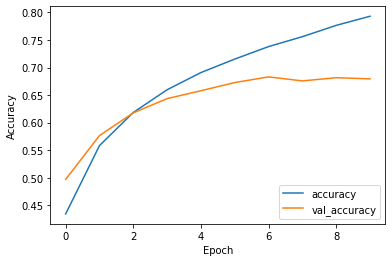

In [ ]:
opt_adam = cnn_basic_model('adam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1803 - accuracy: 0.1885 - val_loss: 2.0095 - val_accuracy: 0.2686
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8294 - accuracy: 0.3414 - val_loss: 1.6782 - val_accuracy: 0.3971
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6156 - accuracy: 0.4178 - val_loss: 1.6304 - val_accuracy: 0.4106
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4984 - accuracy: 0.4641 - val_loss: 1.4544 - val_accuracy: 0.4744
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4169 - accuracy: 0.4931 - val_loss: 1.3884 - val_accuracy: 0.5067
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3475 - accuracy: 0.5212 - val_loss: 1.3079 - val_accuracy: 0.5396
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2842 - accuracy: 0.5433 - val_loss: 1.3155 - val_accuracy:

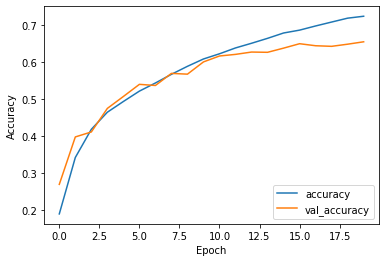

In [ ]:
opt_sgd =cnn_basic_model('sgd',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#####  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.1026 - val_loss: 2.2998 - val_accuracy: 0.1046
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2982 - accuracy: 0.1339 - val_loss: 2.2951 - val_accuracy: 0.1426
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1462 - val_loss: 2.2910 - val_accuracy: 0.1412
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2896 - accuracy: 0.1507 - val_loss: 2.2870 - val_accuracy: 0.1455
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2854 - accuracy: 0.1530 - val_loss: 2.2828 - val_accuracy: 0.1516
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2810 - accuracy: 0.1543 - val_loss: 2.2784 - val_accuracy: 0.1617
Epoch 7/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2764 - accuracy: 0.1655 - val_loss: 2.2736 - val_ac

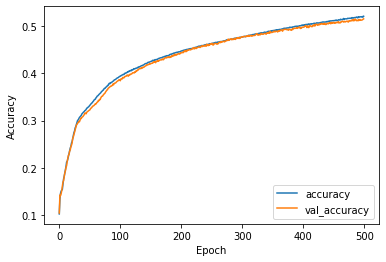

In [ ]:
opt_adadelta= cnn_basic_model('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1448 - val_loss: 2.2781 - val_accuracy: 0.1769
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2016 - accuracy: 0.2136 - val_loss: 2.0867 - val_accuracy: 0.2407
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0414 - accuracy: 0.2656 - val_loss: 2.0079 - val_accuracy: 0.2732
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9968 - accuracy: 0.2849 - val_loss: 1.9792 - val_accuracy: 0.2852
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9720 - accuracy: 0.2947 - val_loss: 1.9582 - val_accuracy: 0.2993
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9519 - accuracy: 0.3042 - val_loss: 1.9406 - val_accuracy: 0.3072
Epoch 7/500
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9339 - accuracy: 0.3138 - val_loss: 1.9238 - val_ac

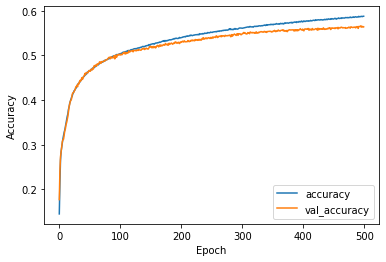

In [ ]:
opt_adagrad = cnn_basic_model('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7499 - accuracy: 0.3688 - val_loss: 1.5883 - val_accuracy: 0.4297
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5001 - accuracy: 0.4660 - val_loss: 1.4338 - val_accuracy: 0.4919
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3943 - accuracy: 0.5041 - val_loss: 1.3419 - val_accuracy: 0.5264
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3105 - accuracy: 0.5369 - val_loss: 1.3041 - val_accuracy: 0.5474
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2419 - accuracy: 0.5651 - val_loss: 1.2330 - val_accuracy: 0.5640
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1786 - accuracy: 0.5866 - val_loss: 1.1799 - val_accuracy: 0.5872
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1241 - accuracy: 0.6051 - val_loss: 1.1881 - val_accuracy:

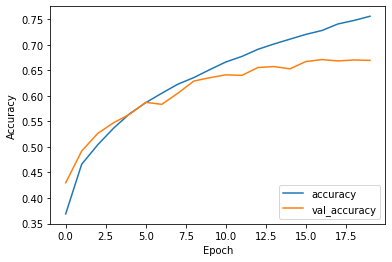

In [ ]:
opt_adamax = cnn_basic_model('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

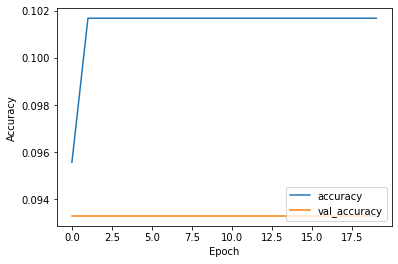

In [ ]:
opt_ftrl = cnn_basic_model('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5560 - accuracy: 0.4347 - val_loss: 1.3003 - val_accuracy: 0.5380
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2216 - accuracy: 0.5675 - val_loss: 1.1499 - val_accuracy: 0.5953
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0679 - accuracy: 0.6216 - val_loss: 1.0536 - val_accuracy: 0.6383
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9616 - accuracy: 0.6613 - val_loss: 1.0065 - val_accuracy: 0.6506
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8768 - accuracy: 0.6914 - val_loss: 0.9847 - val_accuracy: 0.6563
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8037 - accuracy: 0.7175 - val_loss: 0.9333 - val_accuracy: 0.6763
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7398 - accuracy: 0.7406 - val_loss: 0.9406 - val_accuracy:

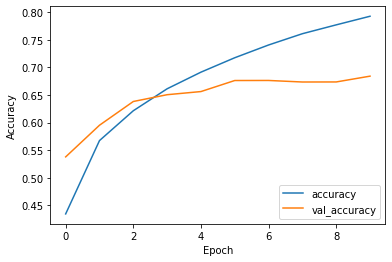

In [ ]:
opt_nadam = cnn_basic_model('Nadam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### TASK 1.2  Residual Neural Netowrk

##### Resnet Model

In [8]:
def resnet(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  # Input image shape = 32 x 32 x 3
  # Initial Block
  conv1 = tf.keras.layers.Conv2D(32,1,padding = 'SAME',activation='relu')(inputs) # shape = 32 x 32 x 16 
  conv1_pool = tf.keras.layers.MaxPool2D(2)(conv1) #shape = 32 x 32 x 16
  
  #Block 1
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv1_pool) # shape = 16 x 16 x 16
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv2) # shape = 16 x 16 x 16
  add1 = tf.keras.layers.Add()([conv1_pool,conv2,]) # shape = 16 x 16 x 16
  add1_relu = tf.keras.layers.Activation('relu')(add1) # shape = 16 x 16 x 16

  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(add1_relu) # shape = 16 x 16 x 16
  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv3) # shape = 16 x 16 x 16
  add2 = tf.keras.layers.Add()([add1_relu,conv3]) # shape = 16 x 16 x 16
  add2_relu = tf.keras.layers.Activation('relu')(add2) # shape = 16 x 16 x 16
  
  #Transition 1
  transition_conv1 = tf.keras.layers.Conv2D(64,1,activation = 'relu')(add2_relu) # shape = 16 x 16 x 32
  transition_conv_pool = tf.keras.layers.MaxPool2D(2)(transition_conv1) # shape = 8 x 8 x 32
  
  #Block 2
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(transition_conv_pool)  # shape = 8 x 8 x 32
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv4) # shape = 8 x 8 x 32
  add3 = tf.keras.layers.Add()([transition_conv_pool,conv4]) # shape = 8 x 8 x 32
  add3_relu = tf.keras.layers.Activation('relu')(add3) # shape = 8 x 8 x 32

  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(add3_relu) # shape = 8 x 8 x 32 
  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv5)# shape = 8 x 8 x 32
  add4 = tf.keras.layers.Add()([add3_relu,conv5])# shape = 8 x 8 x 32
  add4_relu = tf.keras.layers.Activation('relu')(add4)# shape = 8 x 8 x 32

  #Transition 2
  transition_conv2 = tf.keras.layers.Conv2D(128,1,activation = 'relu')(add4_relu) # shape = 8 x 8 x 64
  transition_conv2_pool = tf.keras.layers.MaxPool2D(2)(transition_conv2) # shape = 4 x 4 x 64
  #print(transition_conv2_pool)

  #Block 3
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(transition_conv2_pool) # shape = 4 x 4 x 64 
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv6)# shape = 4 x 4 x 64
  add5 = tf.keras.layers.Add()([transition_conv2_pool,conv6])# shape = 4 x 4 x 64
  add5_relu = tf.keras.layers.Activation('relu')(add5)# shape = 4 x 4 x 64
  #print(add5_relu)

  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(add5_relu) # shape = 4 x 4 x 64 
  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv7)# shape = 4 x 4 x 64
  add6 = tf.keras.layers.Add()([add5_relu,conv7])# shape = 4 x 4 x 64
  add6_relu = tf.keras.layers.Activation('relu')(add6)# shape = 4 x 4 x 64
  #print(add6_relu)

  #Average pool
  avg_pool = tf.keras.layers.MaxPool2D(2)(add6_relu)# shape = 4 x 4 x 64

  #MLP
  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))


#### Training

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1950 - accuracy: 0.2516 - val_loss: 2.1249 - val_accuracy: 0.3263
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1082 - accuracy: 0.3456 - val_loss: 2.0803 - val_accuracy: 0.3755
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0678 - accuracy: 0.3859 - val_loss: 2.0736 - val_accuracy: 0.3816
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0345 - accuracy: 0.4213 - val_loss: 2.0227 - val_accuracy: 0.4310
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0112 - accuracy: 0.4438 - val_loss: 1.9888 - val_accuracy: 0.4659
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9891 - accuracy: 0.4660 - val_loss: 1.9908 - val_accuracy: 0.4646
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9735 - accuracy: 0.4825 - val_loss: 1.9709 - val_accuracy:

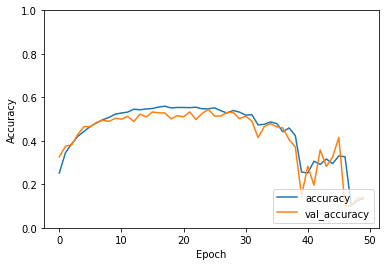

In [52]:
opt_adam_resnet= resnet('adam',cifar_train_x,cifar_train_y,50,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 10

Epoch 1/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1153 - val_loss: 2.2887 - val_accuracy: 0.1163
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2345 - accuracy: 0.2123 - val_loss: 2.1792 - val_accuracy: 0.2739
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1693 - accuracy: 0.2788 - val_loss: 2.1550 - val_accuracy: 0.2981
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1420 - accuracy: 0.3099 - val_loss: 2.1749 - val_accuracy: 0.2713
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1185 - accuracy: 0.3363 - val_loss: 2.1017 - val_accuracy: 0.3552
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0969 - accuracy: 0.3583 - val_loss: 2.0864 - val_accuracy: 0.3659
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0794 - accuracy: 0.3763 - val_loss: 2.0752 - val_ac

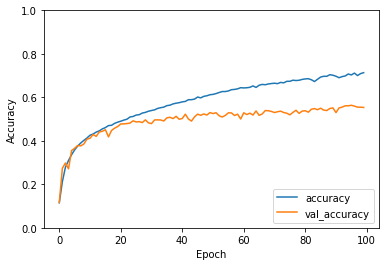

In [53]:
opt_sgd_resnet =resnet('sgd',cifar_train_x,cifar_train_y,100,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#####  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3029 - accuracy: 0.1035 - val_loss: 2.3016 - val_accuracy: 0.1311
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3012 - accuracy: 0.1318 - val_loss: 2.3003 - val_accuracy: 0.1282
Epoch 3/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3000 - accuracy: 0.1156 - val_loss: 2.2991 - val_accuracy: 0.1233
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2990 - accuracy: 0.1134 - val_loss: 2.2980 - val_accuracy: 0.1212
Epoch 5/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1148 - val_loss: 2.2969 - val_accuracy: 0.1325
Epoch 6/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2967 - accuracy: 0.1406 - val_loss: 2.2956 - val_accuracy: 0.1431
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2953 - accuracy: 0.1417 - val_loss: 2.2940 - val_ac

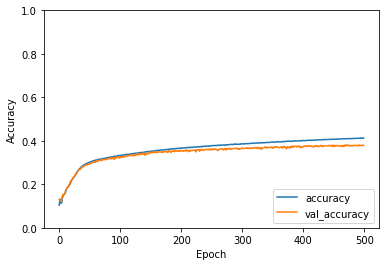

In [54]:
opt_adadelta_resnet= resnet('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3014 - accuracy: 0.1042 - val_loss: 2.2988 - val_accuracy: 0.1034
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2961 - accuracy: 0.1178 - val_loss: 2.2910 - val_accuracy: 0.1193
Epoch 3/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2805 - accuracy: 0.1560 - val_loss: 2.2657 - val_accuracy: 0.1818
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2456 - accuracy: 0.2022 - val_loss: 2.2198 - val_accuracy: 0.2405
Epoch 5/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2037 - accuracy: 0.2516 - val_loss: 2.1885 - val_accuracy: 0.2635
Epoch 6/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1825 - accuracy: 0.2681 - val_loss: 2.1783 - val_accuracy: 0.2750
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1702 - accuracy: 0.2828 - val_loss: 2.1671 - val_ac

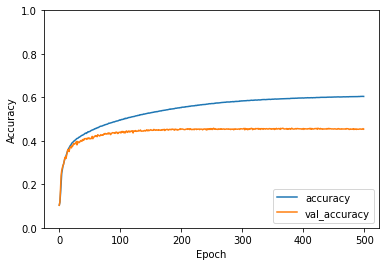

In [10]:
opt_adagrad_resnet = resnet('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1569 - accuracy: 0.2918 - val_loss: 2.1172 - val_accuracy: 0.3324
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0916 - accuracy: 0.3619 - val_loss: 2.1138 - val_accuracy: 0.3384
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0502 - accuracy: 0.4051 - val_loss: 2.0365 - val_accuracy: 0.4206
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0126 - accuracy: 0.4432 - val_loss: 2.0083 - val_accuracy: 0.4464
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9855 - accuracy: 0.4710 - val_loss: 1.9669 - val_accuracy: 0.4894
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9601 - accuracy: 0.4967 - val_loss: 1.9676 - val_accuracy: 0.4887
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9406 - accuracy: 0.5175 - val_loss: 1.9366 - val_accuracy:

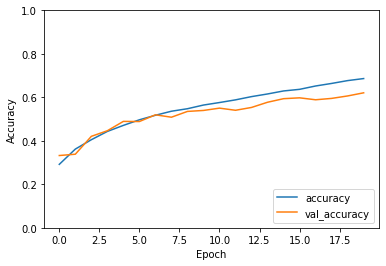

In [14]:
opt_adamax_resnet = resnet('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

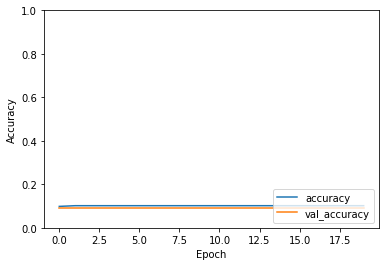

In [10]:
opt_ftrl_resnet = resnet('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1651 - accuracy: 0.2841 - val_loss: 2.1246 - val_accuracy: 0.3304
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1011 - accuracy: 0.3512 - val_loss: 2.0797 - val_accuracy: 0.3753
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0646 - accuracy: 0.3898 - val_loss: 2.0533 - val_accuracy: 0.4028
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0429 - accuracy: 0.4125 - val_loss: 2.0230 - val_accuracy: 0.4309
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0154 - accuracy: 0.4405 - val_loss: 1.9848 - val_accuracy: 0.4711
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9933 - accuracy: 0.4628 - val_loss: 1.9921 - val_accuracy: 0.4644
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9765 - accuracy: 0.4799 - val_loss: 1.9669 - val_ac

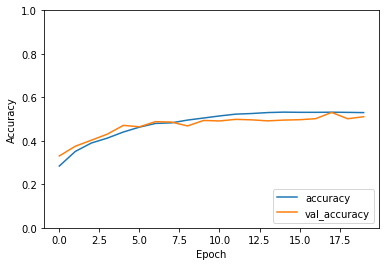

In [9]:
opt_nadam_resnet = resnet('Nadam',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### TASK 1.3 Inception Neural Network

#### Model

In [83]:
def inception_net(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  
  incnet0 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(inputs)
  incnet0 = tf.keras.layers.MaxPool2D(2,strides=2)(incnet0)
  print(incnet0)

  # Block 1 :
  # Part 1: incnet0 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  #print(incnet_p1)
  # Part 2: incnet0 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p2 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: incnet0 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p3 = tf.keras.layers.Conv2D(2,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: incnet0 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(incnet0)
  incnet_p4 = tf.keras.layers.Conv2D(2,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 1
  block1 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 2 :
  # Part 1: block1 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  #print(incnet_p1)
  # Part 2: block1 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p2 = tf.keras.layers.Conv2D(4,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block1 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p3 = tf.keras.layers.Conv2D(4,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block1 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block1)
  incnet_p4 = tf.keras.layers.Conv2D(4,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block2 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block2_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block2)

  # Block 3 :
  # Part 1: block2maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  #print(incnet_p1)
  # Part 2: block2maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block2maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(8,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block2maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block2_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(8,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block3 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 4 :
  # Part 1: block3 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  #print(incnet_p1)
  # Part 2: block3 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p2 = tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block3 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p3 = tf.keras.layers.Conv2D(16,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block3 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block3)
  incnet_p4 = tf.keras.layers.Conv2D(16,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block4 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block4_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block4) 

  # Block 5 :
  # Part 1: block4_maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  #print(incnet_p1)
  # Part 2: block4_maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(32,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block4_maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(32,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block4_maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block4_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(32,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block5 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #avgpool
  avg_pool = tf.keras.layers.MaxPool2D(2)(block5)

  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  model.summary()
  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

#### Training

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Tensor("max_pooling2d_135/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Model: "functional_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_482 (Conv2D)             (None, 32, 32, 2)    56          input_36[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_135 (MaxPooling2D (None, 16, 16, 2)    0           conv2d_482[0][0]                 
__________________________________________________________________________________________________
conv2d_484 (Conv2D)             (None, 16, 16, 2)    6           max_pooling2d_135[0][0]          
________

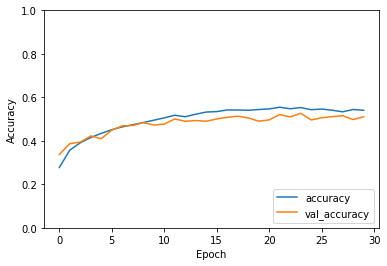

In [85]:
opt_adam_inception_net= inception_net('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

In [72]:
conscccinception_net()

Tensor("max_pooling2d_76/MaxPool:0", shape=(None, 16, 16, 8), dtype=float32)
Model: "functional_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_265 (Conv2D)             (None, 32, 32, 8)    224         input_29[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_76 (MaxPooling2D) (None, 16, 16, 8)    0           conv2d_265[0][0]                 
__________________________________________________________________________________________________
conv2d_267 (Conv2D)             (None, 16, 16, 8)    72          max_pooling2d_76[0][0]           
_________

## Task 2 : Reqularization

* Motivation: Investigate how different Regularization techniques affect the training behavior.

* Dataset : Cifar10

* Architecture : Best model from Task1's architecture

* Regularization techniques:
 * L1, L2 regularizer
 * Dropouts
 * Adding noise

* Comparision Criteria: Training Curves
 * Steps still convergence
 * Training accuracy untill convergence
 * Stability of training


## Task 3: Transfer Learning